In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from keras.preprocessing import image
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, ImageDataGenerator, load_img

In [78]:
# Get the list of files in the folder
files_hotdog = os.listdir('hotdog-nothotdog/train/hotdog/')
hotdog_train = len(files_hotdog)
hotdog_train

files_nothotdog = os.listdir('hotdog-nothotdog/train/nothotdog//')
nothotdog_train = len(files_nothotdog)
nothotdog_train

print("Hotdog:", hotdog_train)
print("nothotdog_train:", nothotdog_train)



Hotdog: 1500
nothotdog_train: 1500


In [79]:
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rescale=1./255
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [86]:
image_size = (128, 128)
input_shape = (128, 128, 3)

In [87]:
training_set = train_datagen.flow_from_directory(
        "hotdog-nothotdog/train",
        batch_size=32,
        class_mode='binary',
        target_size=image_size,
) #class_mode is either binary or categorical

Found 3000 images belonging to 2 classes.


In [88]:
test_set = test_datagen.flow_from_directory(
        "hotdog-nothotdog/test",
        target_size=image_size,
        batch_size=32,
        class_mode='binary')

Found 644 images belonging to 2 classes.


In [89]:
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
vgg19.trainable = False

cnn = Sequential()
cnn.add(vgg19)
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [68]:
# cnn = Sequential([
#     Conv2D(32, 3, activation='relu', input_shape=input_shape),
#     MaxPooling2D(2, strides=1),
#     Dropout(0.2),
#     Conv2D(32, 3, activation='relu'),
#     MaxPooling2D(2, strides=1),
#     Dropout(0.2),
#     # Conv2D(32, 3, activation='relu'),
#     # MaxPooling2D(2, strides=1),
#     Dropout(0.2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     # Dropout(0.2),
#     Dense(1, activation='sigmoid')

# ])

In [90]:
cnn.compile(
    optimizer='rmsprop',
    loss='bce',
    metrics=['accuracy']
)

es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

cnn.fit(
    x= training_set,
    validation_data=test_set,
    batch_size=32,
    epochs=50,
    callbacks=es,
)

Epoch 1/50
94/94 [==============================] - 194s 2s/step - loss: 0.6848 - accuracy: 0.7133 - val_loss: 0.4210 - val_accuracy: 0.7904
Epoch 2/50
94/94 [==============================] - 216s 2s/step - loss: 0.4869 - accuracy: 0.7733 - val_loss: 0.4229 - val_accuracy: 0.7966
Epoch 3/50
94/94 [==============================] - 219s 2s/step - loss: 0.4562 - accuracy: 0.7887 - val_loss: 0.4165 - val_accuracy: 0.8059
Epoch 4/50
94/94 [==============================] - 211s 2s/step - loss: 0.4062 - accuracy: 0.8160 - val_loss: 0.4779 - val_accuracy: 0.7811
Epoch 5/50
94/94 [==============================] - 220s 2s/step - loss: 0.3746 - accuracy: 0.8320 - val_loss: 0.4134 - val_accuracy: 0.8121
Epoch 6/50
94/94 [==============================] - 223s 2s/step - loss: 0.3555 - accuracy: 0.8403 - val_loss: 0.3863 - val_accuracy: 0.8354
Epoch 7/50
94/94 [==============================] - 206s 2s/step - loss: 0.3302 - accuracy: 0.8597 - val_loss: 0.4293 - val_accuracy: 0.8152
Epoch 8/50
94

In [91]:
cnn.evaluate(test_set)

21/21 [==============================] - 33s 2s/step - loss: 0.3714 - accuracy: 0.8525


[0.3714403808116913, 0.8524844646453857]

In [92]:
predictions = cnn.predict(test_set)

21/21 [==============================] - 32s 2s/step


In [94]:
training_set.class_indices

{'hotdog': 0, 'nothotdog': 1}

Picture of a Hotdog. Our model predict hotdog


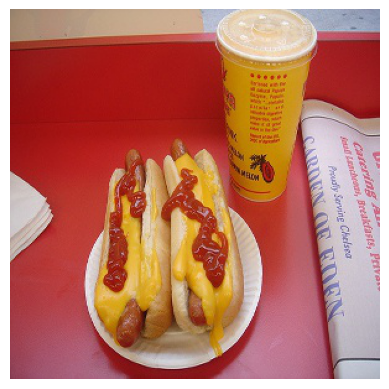

Picture of a Hotdog. Our model predict hotdog


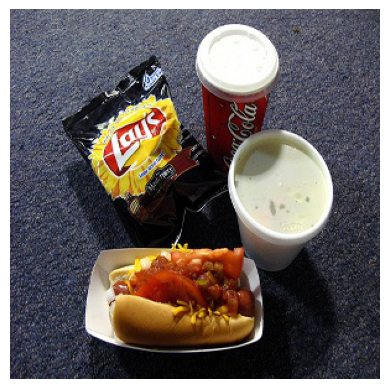

Picture of a Hotdog. Our model predict nothotdog


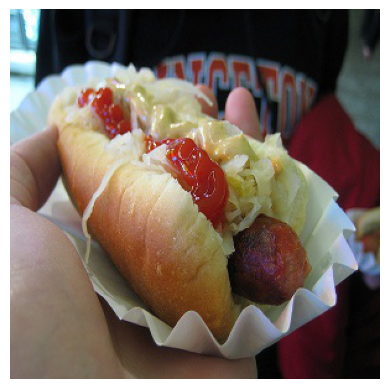

Picture of a Hotdog. Our model predict hotdog


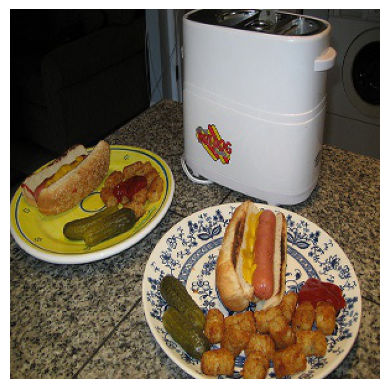

Picture of a Hotdog. Our model predict nothotdog


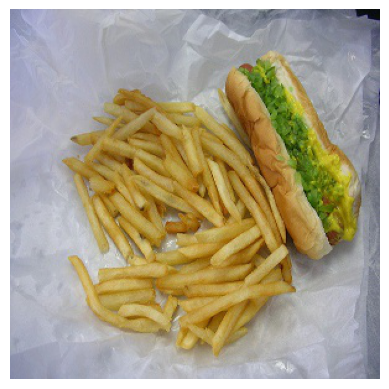

Picture of a Hotdog. Our model predict hotdog


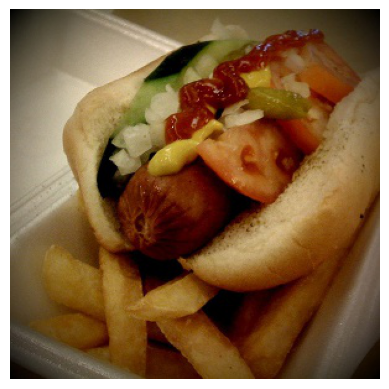

Picture of a Hotdog. Our model predict nothotdog


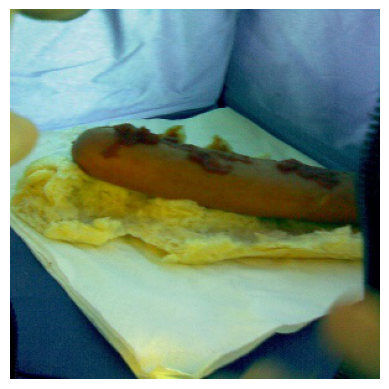

Picture of a Hotdog. Our model predict hotdog


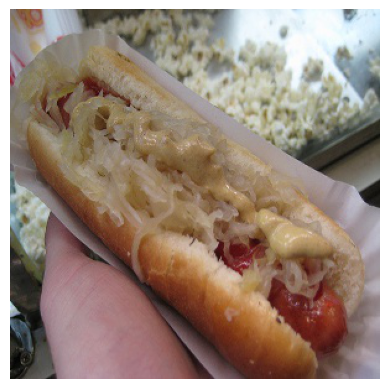

Picture of a Hotdog. Our model predict hotdog


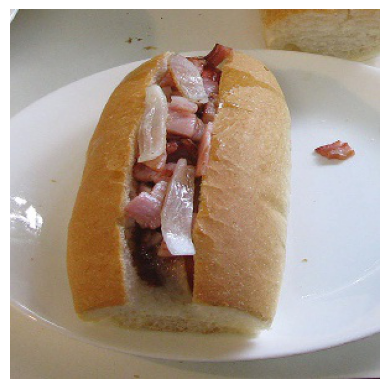

Picture of a Hotdog. Our model predict hotdog


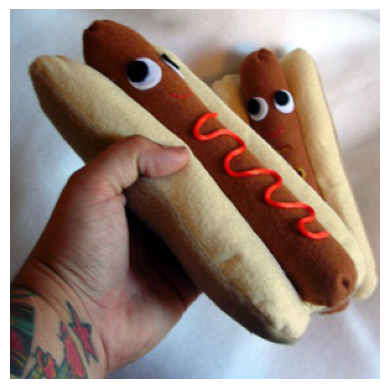

In [113]:
for img in range(1510, 1520):
    
    test_image = image.load_img(f'hotdog-nothotdog/test/hotdog/{img}.jpg', target_size = image_size)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image, verbose=0)

    if result[0][0] > 0.5:
        prediction = 'nothotdog'
    else:
        prediction = 'hotdog'

    print(f"Picture of a Hotdog. Our model predict {prediction}")
     # https://www.google.com/search?q=how+to+read+an+image+in+matplotlib&oq=how+to+read+an+image+in+matplotlib&aqs=chrome..69i57j0i22i30l9.7855j0j9&sourceid=chrome&ie=UTF-8
    img_data = plt.imread(f'hotdog-nothotdog/test/hotdog/{img}.jpg') 
    plt.imshow(img_data)
    plt.axis('off')
    plt.show()


Picture of a nothotdog. Our model predict nothotdog


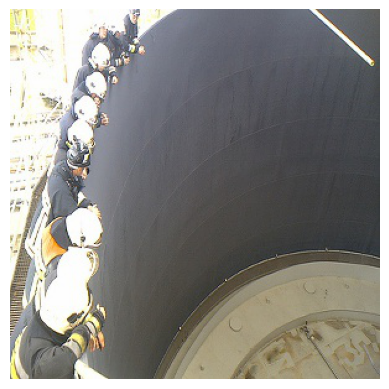

Picture of a nothotdog. Our model predict nothotdog


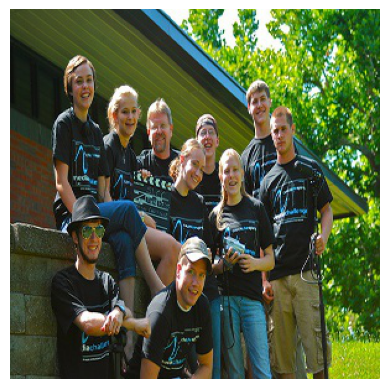

Picture of a nothotdog. Our model predict nothotdog


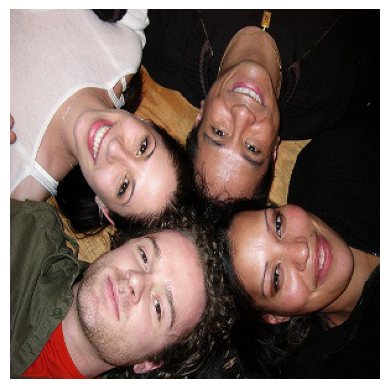

Picture of a nothotdog. Our model predict nothotdog


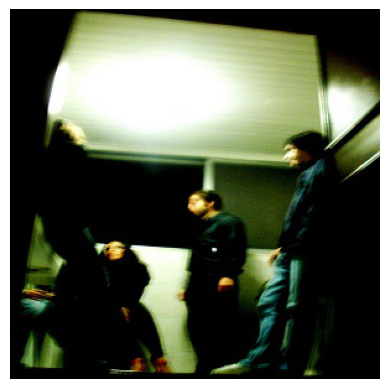

Picture of a nothotdog. Our model predict nothotdog


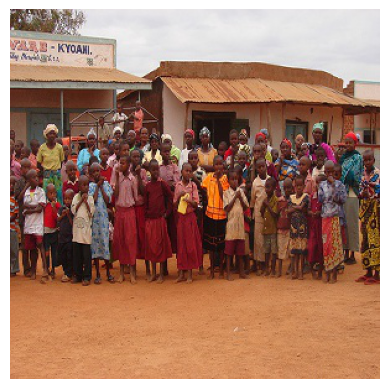

Picture of a nothotdog. Our model predict hotdog


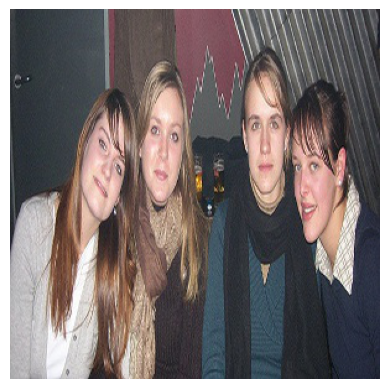

Picture of a nothotdog. Our model predict nothotdog


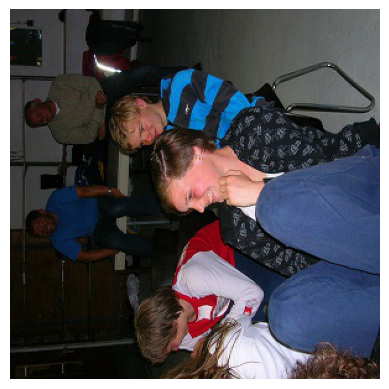

Picture of a nothotdog. Our model predict nothotdog


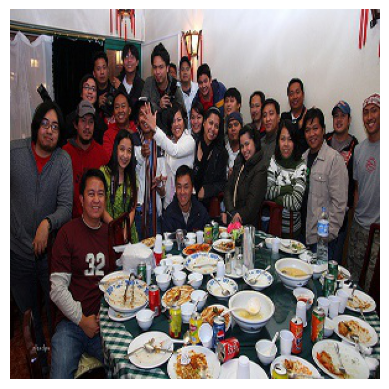

Picture of a nothotdog. Our model predict nothotdog


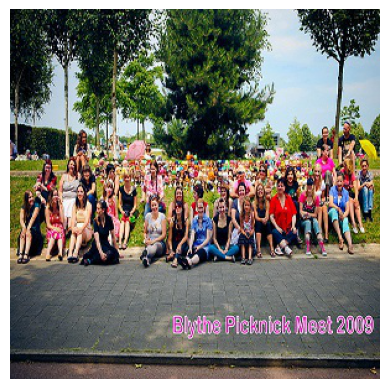

Picture of a nothotdog. Our model predict nothotdog


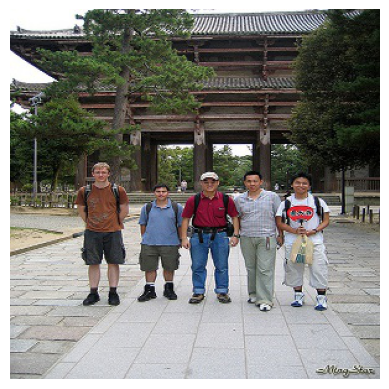

In [122]:
for img in range(2090, 2100):
    
    test_image = image.load_img(f'hotdog-nothotdog/test/nothotdog/{img}.jpg', target_size = image_size)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image, verbose=0)

    if result[0][0] > 0.5:
        prediction = 'nothotdog'
    else:
        prediction = 'hotdog'

    print(f"Picture of a nothotdog. Our model predict {prediction}")
    img_data = plt.imread(f'hotdog-nothotdog/test/nothotdog/{img}.jpg')
    plt.imshow(img_data)
    plt.axis('off')
    plt.show()